(1000,)


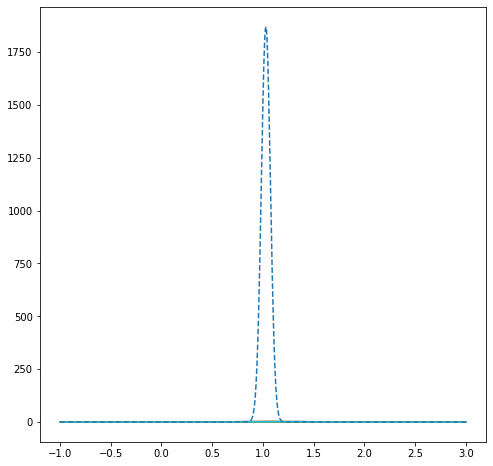

In [55]:
import numpy as np
from scipy import stats
import pylab as plt

N = 20
mu = 1
sigma = 0.2
fake = stats.norm.rvs(loc = mu, scale = sigma, size = N)

x_axis = np.linspace(-1, 3, 1000)
#stats.norm.pdf(x_axis, loc = x, scale = sigma)

likelihoods_fake = np.array([stats.norm.pdf(x_axis, loc = x, scale = sigma) for x in fake])

#print(np.size(likelihoods_fake, axis = 0))
plt.figure(figsize = (8, 8)) 
for x in range(np.size(likelihoods_fake, axis = 0)):
    plt.plot(x_axis, likelihoods_fake[x])
    
   
#A = np.array([(1, 2), (3, 4), (5, 6)])
#print(A)
#print(np.prod(A, axis = 0), np.prod(A, axis = 1))
likelihood = np.prod(likelihoods_fake, axis = 0)
print(likelihood.shape)
plt.plot(x_axis, likelihood, linestyle = '--')

In [56]:
estimate_mu = np.mean(fake)
print(estimate_mu)
LH_estimated_mu = x_axis[np.argsort(likelihood)[-1]]
print(LH_estimated_mu)
#11071-17000

1.030604841808618
1.03003003003003


In [57]:
def fisher_matrix_error(X):
    second_order_diff = np.diff(np.log(X), n = 2)
    second_order_diff /= (x_axis[0] - x_axis[1])**2
    second_order_diff *= -1
    second_order_diff = second_order_diff**(-0.5)
    return second_order_diff[0]
sigma_LH = fisher_matrix_error(likelihood)
print(sigma_LH)

#fisher_error = 
print(sigma/N**0.5)

nan
0.044721359549995794


<ipython-input-57-9d4ebb2a0855>:2: RuntimeWarning: divide by zero encountered in log
  second_order_diff = np.diff(np.log(X), n = 2)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
<ipython-input-57-9d4ebb2a0855>:5: RuntimeWarning: invalid value encountered in power
  second_order_diff = second_order_diff**(-0.5)


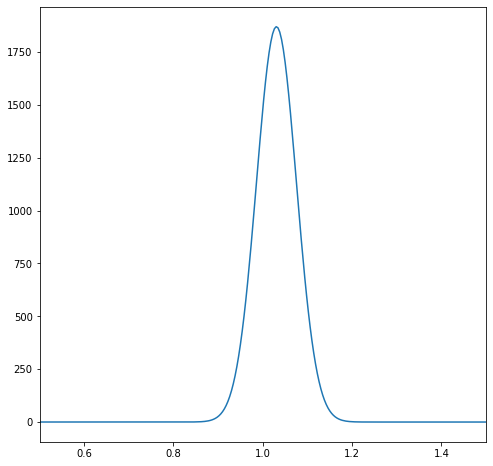

In [58]:
plt.figure(figsize = (8, 8))
plt.xlim(0.5, 1.5)
plt.plot(x_axis, likelihood)
C = 3.27
plt.plot(x_axis, C*stats.norm.pdf(x_axis, loc = LH_estimated_mu, scale = sigma_LH))

[0.18829315 0.27896064 0.23837174 0.17652628 0.227128  ]
[0.91274162 0.87007973 1.05767697 0.66225575 0.60822286]


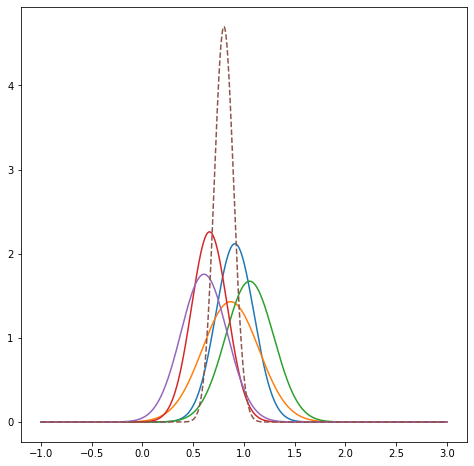

In [95]:
N = 5
mu = 1
sigma_nights = stats.norm.rvs(loc = 0.2, scale = 0.05, size = N)
print(sigma_nights)
fake = np.array([])
for s in sigma_nights:
    fake = np.append(fake, stats.norm.rvs(loc = mu, scale = s, size = 1))

print(fake)

x_axis = np.linspace(-1, 3, 1000)

LH_nights = np.array([stats.norm.pdf(x_axis, loc = l, scale = k) for l, k in zip(fake, sigma_nights)])
    
#print(LH_nights.shape)

plt.figure(figsize = (8, 8)) 

for x in range(np.size(LH_nights, axis = 0)):
    plt.plot(x_axis, LH_nights[x])
      
LL_nights = np.prod(LH_nights, axis = 0)

plt.plot(x_axis, LL_nights, linestyle = '--')



In [98]:
def fisher_matrix_error(X):
    second_order_diff = np.diff(np.log(X), n = 2)
    second_order_diff /= (x_axis[1] - x_axis[0])**2
    second_order_diff *= -1
    second_order_diff = second_order_diff**(-0.5)
    return second_order_diff[0]


LH_estimated_mu_nights = x_axis[np.argsort(LL_nights)[-1]]

print(LH_estimated_mu_nights, np.average(fake, weights = sigma_nights))
print(fisher_matrix_error(LL_nights), (np.sum(1/sigma_nights**2))**(-0.5))

0.8058058058058057 0.8309456901285697
0.09528984929048835 0.09528984929090246
